In [41]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [43]:
 pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px    #these two lines, to see the graph in mybinder
import plotly.io as pio
pio.renderers.default = 'iframe'
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [46]:
x = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/mycart.csv'
df = pd.read_csv(x, 
                     header = None
                    )
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,turkey,burgers,mineral water,eggs,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,red wine,tomato sauce,spaghetti,chocolate,olive oil,french fries,salt,asparagus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,soup,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,eggs,whole wheat rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.dropna(how='all', 
         inplace=True
         )  #drop only if ALL columns are (an entire Row is) NaN
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,turkey,burgers,mineral water,eggs,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,red wine,tomato sauce,spaghetti,chocolate,olive oil,french fries,salt,asparagus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,soup,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,eggs,whole wheat rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.dropna(axis=1,
          how='all', 
          inplace=True
         ) #drop only if entire column is NaN
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,turkey,burgers,mineral water,eggs,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,red wine,tomato sauce,spaghetti,chocolate,olive oil,french fries,salt,asparagus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,soup,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,eggs,whole wheat rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.dropna(thresh = 2, # if there is at least 2 data, the row will be maintained. 
          inplace=True
         )
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,turkey,burgers,mineral water,eggs,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,spaghetti,champagne,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mineral water,salmon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,parmesan cheese,champagne,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6995,red wine,tomato sauce,spaghetti,chocolate,olive oil,french fries,salt,asparagus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,soup,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,eggs,whole wheat rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_str = df.applymap(str)

print('Shape is \t:', 
      df_str.shape
     )

df_str

Shape is 	: (5420, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,turkey,burgers,mineral water,eggs,cooking oil,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,spaghetti,champagne,cookies,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,mineral water,salmon,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,parmesan cheese,champagne,white wine,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6995,red wine,tomato sauce,spaghetti,chocolate,olive oil,french fries,salt,asparagus,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6996,soup,milk,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6997,eggs,whole wheat rice,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [51]:
df_str_lol = df_str.values.tolist()
df_str_lol

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'burgers',
  'mineral water',
  'eggs',
  'cooking oil',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['spaghetti',
  'champagne',
  'cookies',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'salmon',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  '

In [52]:
TE    = TransactionEncoder()
TE_lol = TE.fit(df_str_lol).transform(df_str_lol)
TE_lol

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [53]:
teDf = pd.DataFrame(TE_lol,
                    columns = TE.columns_
                   )
teDf

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5416,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5417,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5418,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [54]:
teDf = teDf.drop(['nan'], #None sometimes
                 axis = 1
                )
teDf

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5416,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5417,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5418,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [55]:
cart = []

for i in range(0, df.shape[0]):
    for j in range(0, df.shape[1]):
        cart.append(df.values[i,j])

print(type(cart))
cart

<class 'list'>


['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil',
 'burgers',
 'meatballs',
 'eggs',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'turkey',
 'burgers',
 'mineral water',
 'eggs',
 'cooking oil',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'spaghetti',
 'champagne',
 'cookies',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'mineral water',
 'salmon',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'shrimp',
 'chocolate',
 'chicken',
 'honey',
 'oil',
 'cooking oil',
 'low fat yogurt',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [56]:
cart = np.array(cart) # converting list to numpy array
cart

array(['shrimp', 'almonds', 'avocado', ..., 'nan', 'nan', 'nan'],
      dtype='<U32')

In [57]:
Ndf = pd.DataFrame(cart, 
                   columns=["items"]
                  ) 

Ndf = Ndf.applymap(str)

# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
Ndf["incident_count"] = 1 
Ndf

,items,incident_count
0,shrimp,1
1,almonds,1
2,avocado,1
3,vegetables mix,1
4,green grapes,1
...,...,...
108395,nan,1
108396,nan,1
108397,nan,1
108398,nan,1


In [58]:
count = Ndf.groupby(['items']).sum() #counting just trues in each column; you can add axis = 0 (optional)
count

,incident_count
items,
asparagus,1
almonds,144
antioxydant juice,56
asparagus,32
avocado,226
...,...
whole wheat pasta,206
whole wheat rice,405
yams,71


In [59]:
count.drop('nan', 
           axis = 0, 
           inplace = True
          )
count

,incident_count
items,
asparagus,1
almonds,144
antioxydant juice,56
asparagus,32
avocado,226
...,...
whole wheat pasta,206
whole wheat rice,405
yams,71


In [60]:
favorites = count.sort_values(by = 'incident_count',
                              ascending = False
                             ).head(10)
favorites

,incident_count
items,
mineral water,1601
spaghetti,1189
eggs,1181
chocolate,1102
french fries,1091
milk,886
green tea,864
ground beef,684
frozen vegetables,672


In [61]:
teDf.columns

Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=120)

In [62]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [75]:
a_rules = apriori(teDf, 
                  min_support = 0.1, 
                  use_colnames = True
                 )
a_rules

,support,itemsets
0,0.112362,(burgers)
1,0.102583,(cake)
2,0.203137,(chocolate)
3,0.217897,(eggs)
4,0.201292,(french fries)
5,0.123985,(frozen vegetables)
6,0.159410,(green tea)
7,0.126199,(ground beef)
8,0.163469,(milk)
9,0.295387,(mineral water)


In [76]:
rules = association_rules(a_rules, 
                          metric = 'lift', 
                          #min_threshold = .01 # 'LIFT' >=.6 will be shown
                         )
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [77]:
a_rules = association_rules(a_rules,
                            metric = 'lift',
                            min_threshold = 3
                           )
a_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


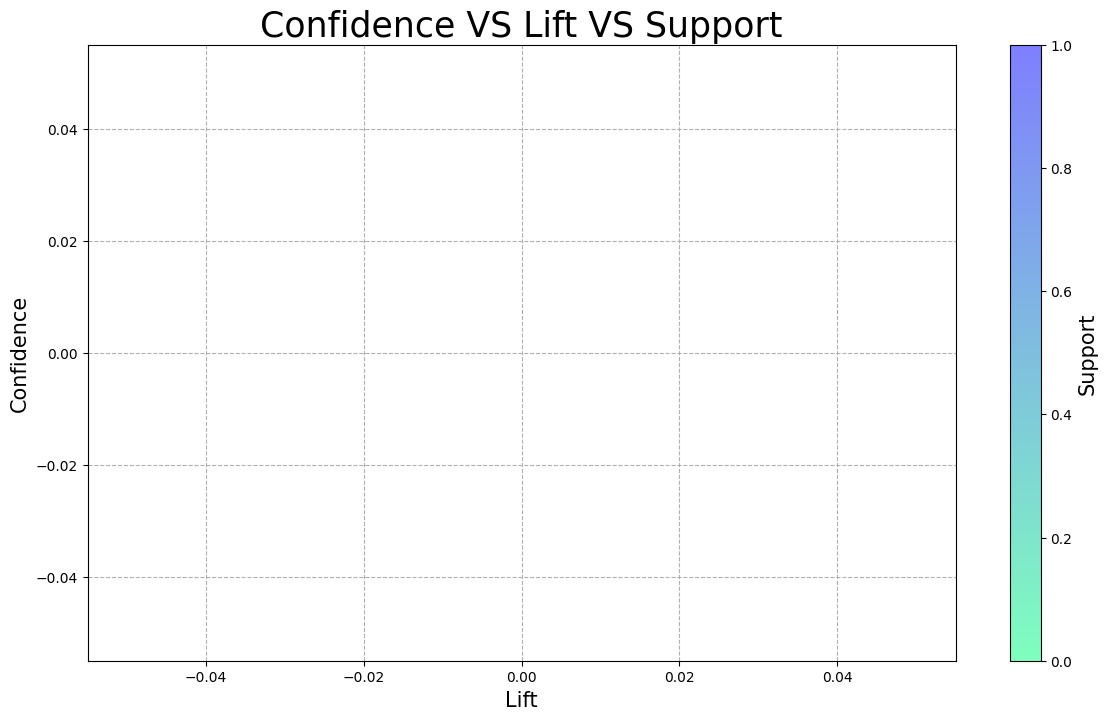

In [78]:
plt.figure(figsize = (14,8))

color = rules.support.tolist()

plt.scatter(x = rules.lift, 
            y = rules.confidence,
            marker = "o", 
            linewidth = 1, 
            alpha = 0.5, 
            c = color, 
            cmap = "winter_r"
           )

plt.grid(ls='dashed')


cbar = plt.colorbar()
cbar.set_label("Support", 
               size = 15
              )

plt.xlabel("Lift", 
           size = 15
          )
plt.ylabel("Confidence", 
           size = 15
          )

plt.title("Confidence VS Lift VS Support", 
           size = 25
         )

plt.show()